In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [10]:
df.columns=['ID','Ref_ind','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

In [11]:
df.head()

,ID,Ref_ind,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [12]:
df2={'ID':1,
     'Ref_ind':1.52101,
     'Na':13.64,
     'Mg':4.49,
     'Al':1.10,
     'Si':71.78,
     'K':0.06,
     'Ca':8.75,
     'Ba':0.00,
     'Fe':0.00,
     'Type':1}
data=df.append(df2,ignore_index = True)
data

,ID,Ref_ind,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1.0
1,3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1.0
2,4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1.0
3,5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1.0
4,6.0,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1.0
...,...,...,...,...,...,...,...,...,...,...,...
209,211.0,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7.0
210,212.0,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7.0
211,213.0,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7.0
212,214.0,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7.0


In [15]:
data.shape

(214, 11)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       214 non-null    float64
 1   Ref_ind  214 non-null    float64
 2   Na       214 non-null    float64
 3   Mg       214 non-null    float64
 4   Al       214 non-null    float64
 5   Si       214 non-null    float64
 6   K        214 non-null    float64
 7   Ca       214 non-null    float64
 8   Ba       214 non-null    float64
 9   Fe       214 non-null    float64
 10  Type     214 non-null    float64
dtypes: float64(11)
memory usage: 18.5 KB


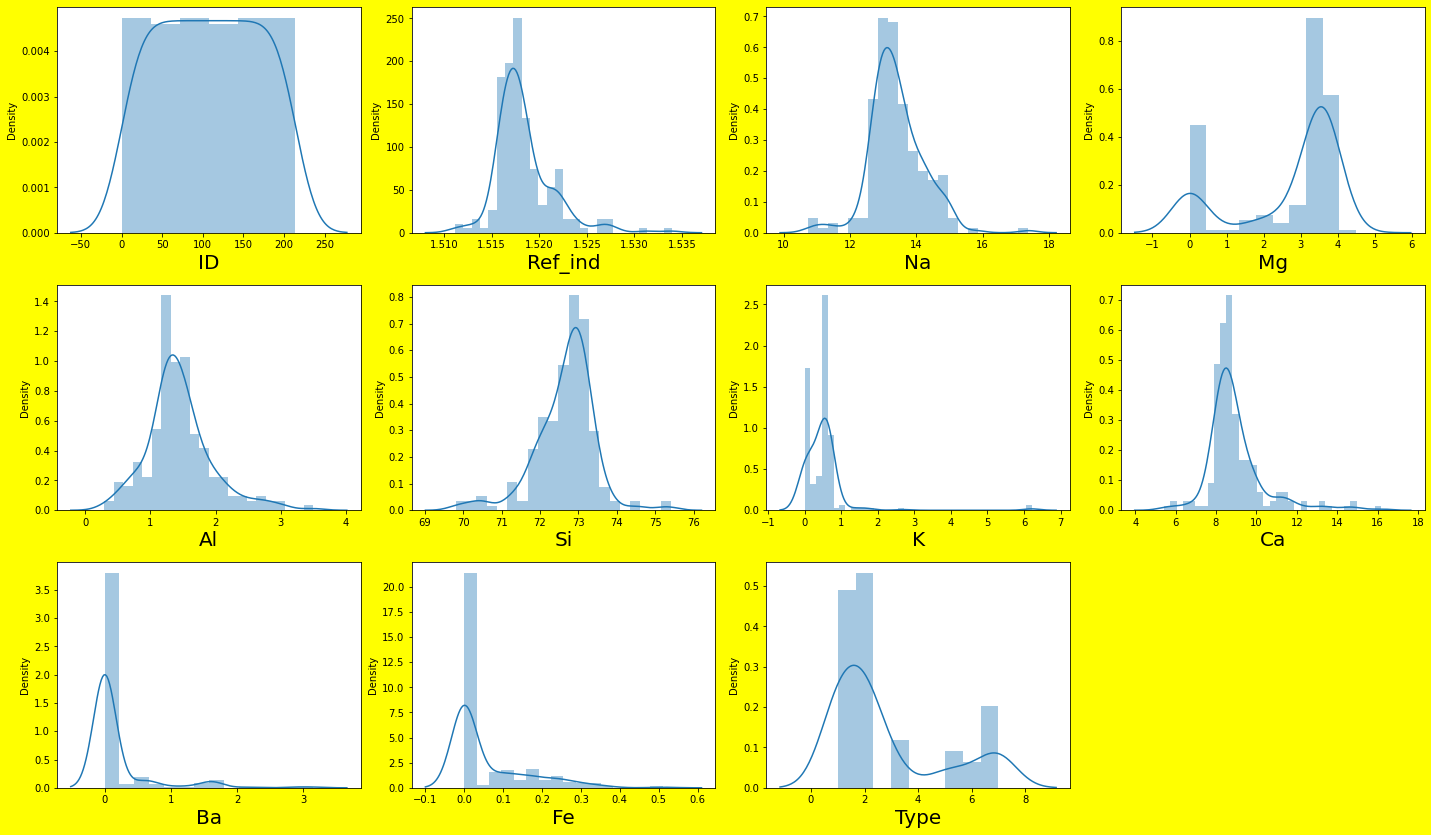

In [17]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotno=1
for column in data:
    if plotno<=11:
        ax=plt.subplot(4,4,plotno)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()

In [18]:
data=data.drop(columns=('ID'),axis=1)
data

,Ref_ind,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1.0
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1.0
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1.0
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1.0
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7.0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7.0
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7.0
212,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7.0


<function matplotlib.pyplot.show(close=None, block=None)>

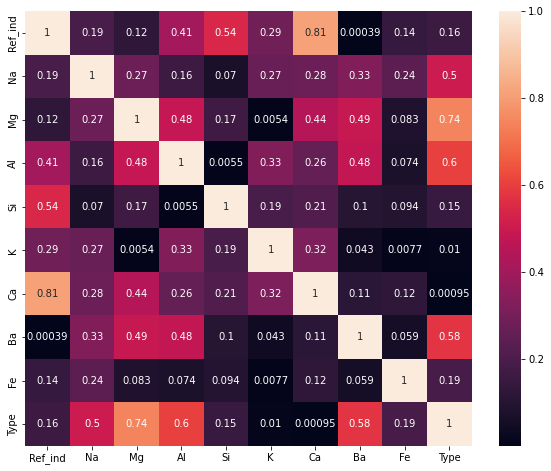

In [23]:
df_corr=data.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show

In [35]:
data['GType'] = [0 if x >=4  else 1 for x in data['Type']]
data
# 0 stands for Window glass, 1 for non window class

,Ref_ind,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,GType
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1.0,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1.0,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1.0,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1.0,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7.0,0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7.0,0
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7.0,0
212,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7.0,0


In [41]:
x=data.drop(columns=['Type','Ca','GType'])
y=data['GType']

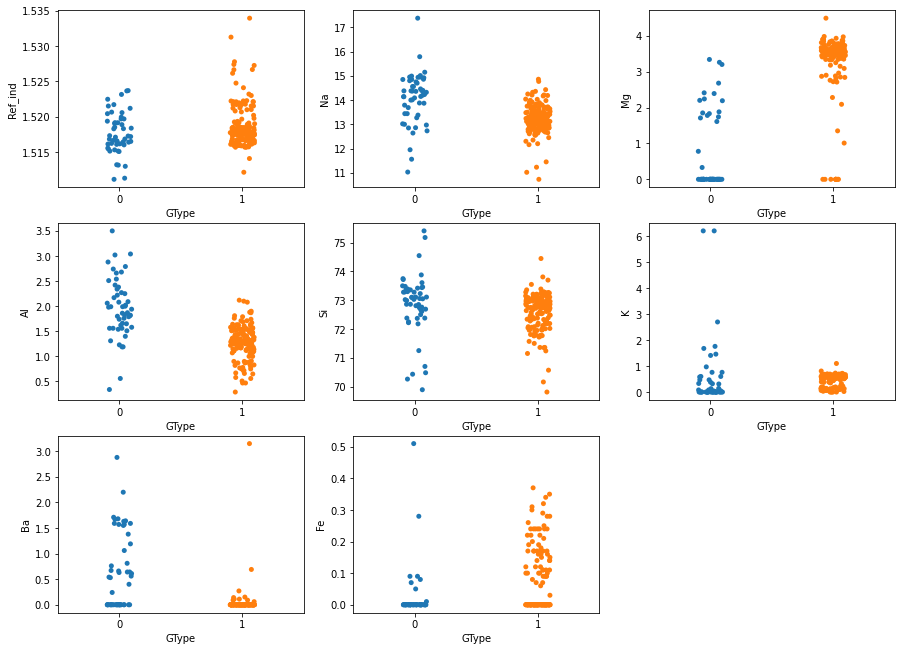

In [42]:
plt.figure(figsize=(15,15))
plotno=1
for column in x:
    if plotno<=11:
        ax=plt.subplot(4,3,plotno)
        sns.stripplot(y,x[column])
    plotno+=1
plt.show()

In [43]:
sc = StandardScaler()
xsc = sc.fit_transform(x)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(xsc,y,test_size=0.22,random_state=666)

In [45]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n ---- Train result ----")
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n ---- Test result ----")
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n Test Classification report \n',classification_report(y_test,pred,digits=2))

In [46]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


 ---- Train result ----
Accuracy Score : 100.00%

 ---- Test result ----
Accuracy Score : 95.83%


 Test Classification report 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.97      0.97      0.97        36

    accuracy                           0.96        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.96      0.96      0.96        48



In [51]:
print(clf.predict(sc.transform([[1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.00]])))

[1]


In [52]:
pickle.dump(clf,open('Glass','wb'))